In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
def show(img):
    plt.figure(figsize=(15,15))
    if (img.ndim==2):
        plt.imshow(img,cmap="gray")        
    # plt.imshow((img))
    else:
        plt.imshow(imutils.opencv2matplotlib(img))
    # plt.axis("off")
    # plt.show()

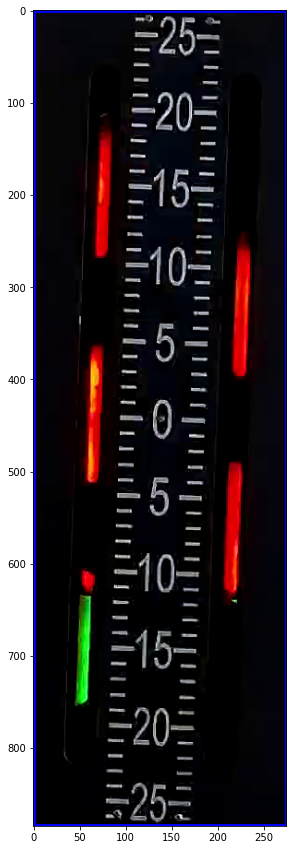

In [2]:
import setting
# path = 'guolu03/guolu340.png'
# path = 'guolu04/guolu804.png'
# path = 'guolu01/guolu96.png'
path = 'guolu02/guolu488.png'
# path = 'guolu04/guolu501.png'
# path = 'guolu04/guolu1047.png'
# path = 'guolu04/guolu512.png'
# scale = {0: (10, 18), 1: (3, 11), 2: (-5, 5), 3: (-8, -3), 4: (-19, -10)}
scale=setting.getAxis()
# scale = {0: (15, 25), 1: (5, 15), 2: (-5, 5), 3: (-15, -5), 4: (-25, -15)}
values = setting.getScale()
img = cv2.imread(path)
x1, y1, w, h = values
x, y = (x1, y1), (x1+w-10, y1+h-10)
cv2.rectangle(img, x, y, (255, 0, 0), 3)
img = img[x[1]:y[1], x[0]:y[0]]
show(img)


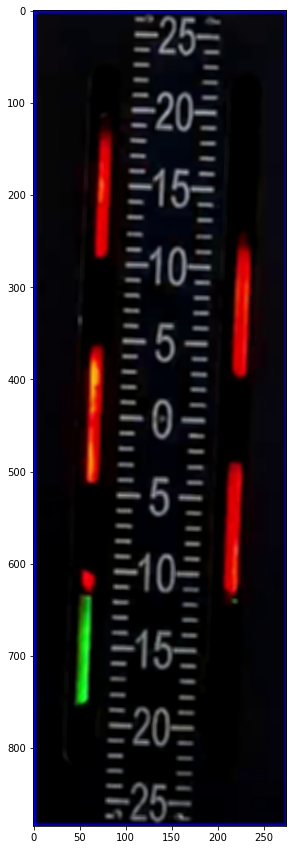

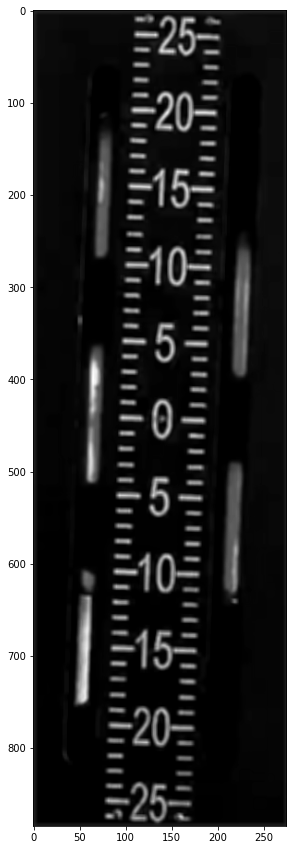

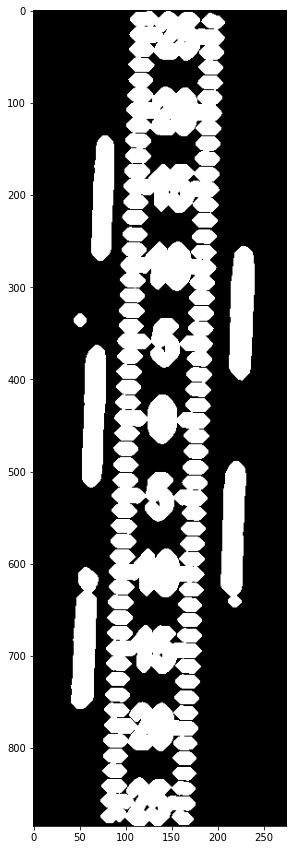

In [3]:
img = cv2.blur(img, (5, 5))
# cv2.imshow("blur", img)
show(img)

image = img.copy()
# ret2 , thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show(gray)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# kernel = np.ones((3, 3), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=5)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,51,9)
show(thresh)

In [4]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return cnts, boundingBoxes



In [5]:

#寻找形状
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("共计：",len(cnts),"个形状")
# 倒序后 要最大的前10个形状
# cnts = imutils.grab_contours(contours)
area_list = sorted(cnts, key=cv2.contourArea, reverse=True)[:20]
(area_list, boundingBoxes) = sort_contours(area_list, method="top-to-bottom")
# 获得他们的坐标
red_boxes = [cv2.boundingRect(c) for c in area_list]

共计： 37 个形状


current area: 2632.0 index is : 2
width 25 height 136 area 2632.0
current area: 3200.5 index is : 6
width 28 height 146 area 3200.5
current area: 3152.5 index is : 8
width 26 height 155 area 3152.5
current area: 3204.5 index is : 11
width 28 height 159 area 3204.5
current area: 3168.5 index is : 15
width 30 height 154 area 3168.5


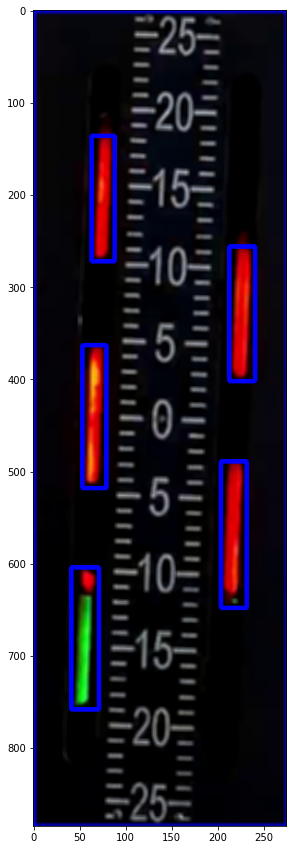

In [6]:
obj=[]
# 循环目标形状集合（最大的前10个）
for i,red_area in enumerate(area_list):
    # 循环获得每个区域的面积
    area=cv2.contourArea(red_area)
    #找出这个区域的坐标
    
    #打印 最大的10个形状，找出面积数值 过滤掉噪声，留下5个温度计形状
    # print("current area:",area) #面积
    # print("red rectangle:x y w h",x, y, w, h)
    # if (w > 8 and h > 70):
    x, y, w, h = cv2.boundingRect(red_area)
    x1, y1 = (x, y), (x + w, y + h)
    # cv2.rectangle(img, x1, y1, (255, 0, 0), 3)

    # print("red rectangle:x y w h", x, y, w, h)
    # print("current area:", area, 'index is :', i)  # 面积
    # print("width", w, "height", h, "area", area)
    # if (area > 20 and area < 4000 ):
    if (area > 20 and area < 4000 and w > 7 and h > 70):
    # if (area > 20 and area < 4000 and w > 7 and w < 30 ):
    # if (w > 7 and h > 70):

        print("current area:",area,'index is :',i) #面积
        print("width", w, "height", h, "area", area)
        obj.append(img[y-5:y+h+5,x-5:x+w+5])  # 实体
        cv2.rectangle(img, x1, y1, (255, 0, 0), 3)

        # cv2.rectangle(img, (x, y), (x + w, y + h), (36, 255, 12), 2)
    
show(img)


1
1
2
1
2


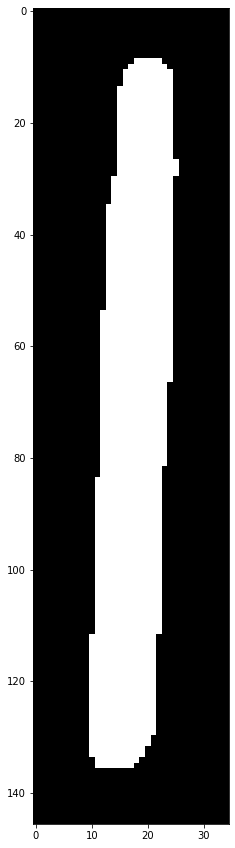

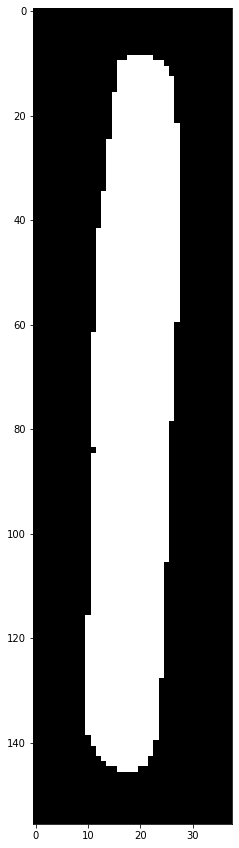

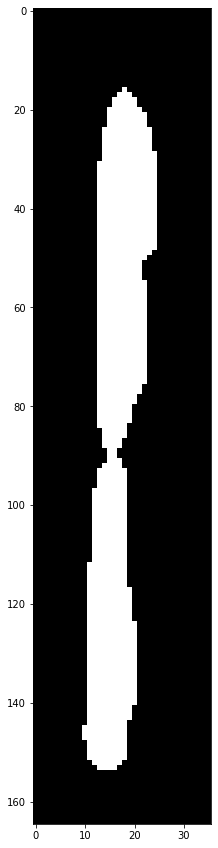

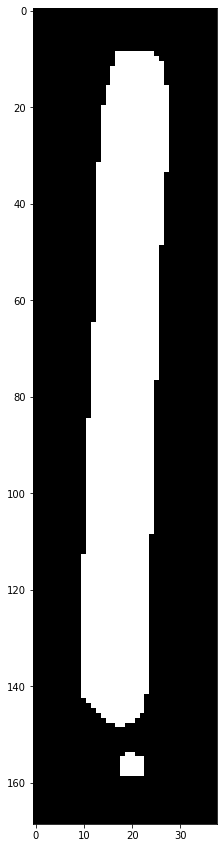

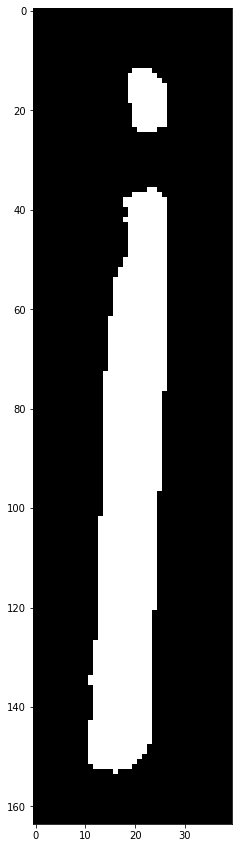

In [19]:
for index, image in enumerate(obj):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    show(thresh)
    cnts, _ = cv2.findContours(
        opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(len(cnts))
    # cnts = imutils.grab_contours(cnts)


length of cnts  1
this index is not inside: 0
length of cnts  1
this index is not inside: 1
length of cnts  2
this index is inside: 2
current area: 578.0
current area: 407.5
current height1: 13 20 12 64
current height2: 11 97 10 55
current height: 61
current value: -0.3787878787878789
current index: 2
new value is 3.407821229050279


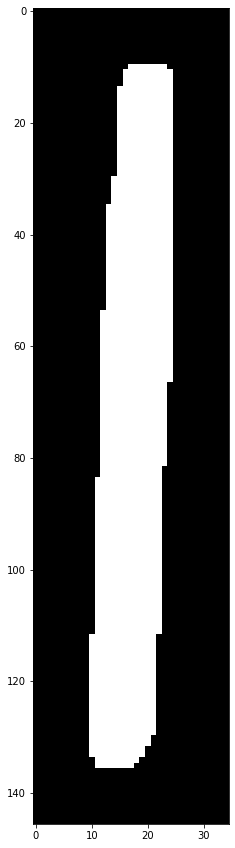

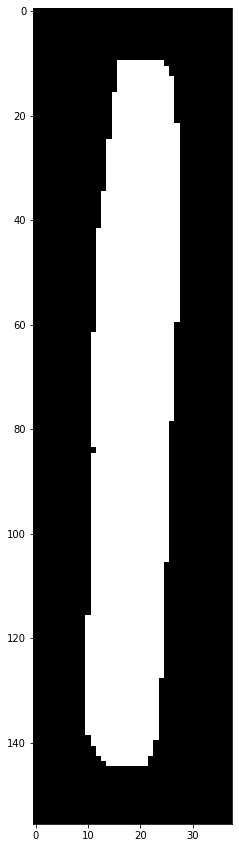

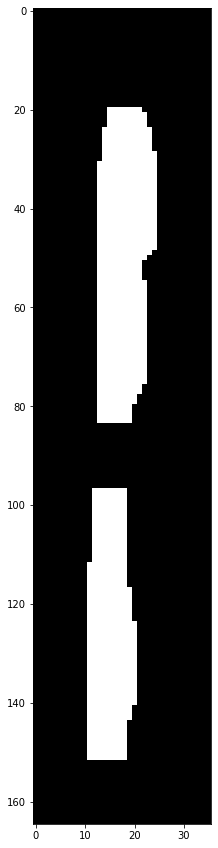

In [20]:
#计算具体显示的数值
#calculateScale
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
height=[]
for index,image in enumerate(obj):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # show(thresh)
    #进行形态学开运算
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)  
    # show(thresh)
    cnts, _ = cv2.findContours(opening,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # cnts = imutils.grab_contours(cnts)
    show(opening)
    print('length of cnts ',len(cnts))

    if len(cnts)>1:
        print("this index is inside:",index)
        # area_list = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
        
        # print("length is :",len(area_list))
        # red_boxes = [cv2.boundingRect(c) for c in area_list]
        # font = cv2.FONT_HERSHEY_SIMPLEX
        (cnts, boundingBoxes) = sort_contours(cnts, method="top-to-bottom")
        for i,red_area in enumerate(cnts):
            area=cv2.contourArea(red_area)
            print("current area:",area)
            if (area>10):
                x, y, w, h = cv2.boundingRect(red_area)
                # print("red rectangle:",x, y, w, h)
                height.append((x,y,w,h))
                # result_img=cv2.rectangle(img, (x+range_x[0], y+range_x[1]), (x+w+range_x[0], y+h+range_x[1]), (255, 0,0 ), 1)
                # result_img=cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0,0 ), 1)
                # show(result_img)
        if len(height)==2:
            x1,y1,w1,h1=height[0]
            x2,y2,w2,h2=height[1]
            print("current height1:", x1, y1, w1, h1)
            print("current height2:", x2, y2, w2, h2)

            value= int((y2-(y1+h1))/2)
            current_height=h2+value
            total_height=y2+h2-y1
            min,max=scale[index]
            # print(min,max)
            cur_Value=min+current_height/(total_height/(max-min))
            print("current height:", current_height)
            print("current value:", cur_Value)
            print("current index:", index)
            new_value = 50/895*current_height
            print('new value is',new_value)
        break
    else:
        print("this index is not inside:",index)
        continue



In [9]:
img=obj[1]
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # 转换空间


In [10]:
h_min = 35
h_max = 77
s_min = 43
s_max = 255
v_min = 46
v_max = 255
print(h_min, h_max, s_min, s_max, v_min, v_max)
green_lower = np.array([h_min, s_min, v_min])
green_upper = np.array([h_max, s_max, v_max])
green_mask = cv2.inRange(imgHSV, green_lower, green_upper)

35 77 43 255 46 255


In [11]:
contours, _ = cv2.findContours(green_mask.copy(),
                                   cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
print("length of countours:",len(contours))
if(len(contours) > 0):
    area_list = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
    red_boxes = [cv2.boundingRect(c) for c in area_list]
    for red_area in area_list:
        area = cv2.contourArea(red_area)
        if (area > 100):
            x, y, w, h = cv2.boundingRect(red_area)
            result_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)
show(result_img)

length of countours: 0


NameError: name 'result_img' is not defined

In [ ]:
h_min = 0
h_max = 10
s_min = 43
s_max = 255
v_min = 46
v_max = 255

print(h_min, h_max, s_min, s_max, v_min, v_max)
red_lower = np.array([h_min, s_min, v_min])
red_upper = np.array([h_max, s_max, v_max])
red_mask = cv2.inRange(imgHSV, red_lower, red_upper)

In [ ]:
contours, _ = cv2.findContours(red_mask.copy(),
                                   cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
print("length of countours:",len(contours))

if(len(contours) > 0):
    area_list = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
    red_boxes = [cv2.boundingRect(c) for c in area_list]
    for red_area in area_list:
        area = cv2.contourArea(red_area)
        if (area > 100):
            x, y, w, h = cv2.boundingRect(red_area)
            result_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 1)
show(result_img)

In [ ]:
import cv2
from matplotlib import pyplot as plt


    # #DO PYTHON MATPLOTLIB IMAGE DISPLAY
    # plt.imshow(image_seg)
    # plt.draw()
    # plt.show()  # , plt.draw(), plt.show()
    # plt.pause(0.01)
    # #DO OPENCV IMSHOW IMAGE DISPLAY
    # cv2.imshow("video", frame)
    # #key handling
    # k = cv2.waitKey(wait_key) & 0xff
    # if chr(k) == 'r':  #start running
    #     wait_key = 30
    # elif chr(k) == 'p':  #pause between frames
    #     wait_key = 0
    # elif k == 27:  #end processing
    #     break
    # else:
    #     k = 0